## EXERCISE
Dataset yang digunakan adalah Admission_Predict.csv. X = 'GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', Y = Chance of Admit

Buat beberapa percobaan untuk menemukan model MLR terbaik

Urutan **percobaan 1 (train 80% test 20%):**

1.a) Variabel independent tidak ada intervensi sama sekali

1.b) Handling outlier

1.c) Scalling

Urutan **percobaan 2 (train 90% test 10%):**

2.a) Variabel independent tidak ada intervensi sama sekali

2.b) Handle outlier

2.c) Scalling

Di setiap percobaan tampilkan MAE, MSE, dan RMSE + Perkembangan secara persentase

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #untuk splitting data
from sklearn.linear_model import LinearRegression #untuk buat prediksi linearRegression
from sklearn import metrics 
%matplotlib inline

In [4]:
dataset = pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\MODULE 3\Admission_Predict.csv')

In [5]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
np.quantile(dataset['Chance of Admit '], .25)

0.64

In [8]:
Q1 = dataset['Chance of Admit '].describe()['25%']
Q2 = dataset['Chance of Admit '].describe()['50%']
Q3 = dataset['Chance of Admit '].describe()['75%']

IQR = (Q3 - Q1)*1.5
IQR

0.2849999999999999

In [9]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Trial 1, Experiment 1 : No Intervensions.

In [10]:
X = dataset[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y = dataset[['Chance of Admit ']].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Training Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame(regressor.coef_[0], X_columns, columns=['Coefficient/Slope'])  
coeff_df.sort_values('Coefficient/Slope', ascending=False)

,Coefficient/Slope
CGPA,0.124632
Research,0.024144
LOR,0.021184
University Rating,0.006572
GRE Score,0.002071
TOEFL Score,0.001955
SOP,-0.004728


In [13]:
regressor.coef_[0]

array([ 0.00207128,  0.00195523,  0.00657193, -0.00472847,  0.02118445,
        0.12463177,  0.02414366])

### Model : 
> Y = B1X1 + B2X2 + B3X3 + ... + B7X7 + I + e

Y = Admission Admit Prediction

Bn = Coefiecient-n

Xn = Variables/features - n

I = Intercept

e = error

In [14]:
gre = float(input('GRE Score(0-340): '))
toefl = float(input('TOEFL Score(0-120): '))
univ = float(input('Univ Rating(0-5): '))
sop = float(input('Statement of Purpose(0-5): '))
lor = float(input('LOR(0-5): '))
cgpa = float(input('Undergraduate GPA(0-10): '))
research = float(input('GRE Score(0 or 1): '))

Y = ((regressor.coef_[0, 0] * gre) + (regressor.coef_[0, 1] * toefl) + (regressor.coef_[0, 2] * univ) + 
    (regressor.coef_[0, 3] * sop) + (regressor.coef_[0, 4] * lor) + (regressor.coef_[0, 5] * cgpa) + 
    (regressor.coef_[0, 6] * research) + regressor.intercept_[0])

print('The Prediction of Your Admit Chances: {}%'.format(round(Y*100), 2))

GRE Score(0-340): 340
TOEFL Score(0-120): 100
Univ Rating(0-5): 4
Statement of Purpose(0-5): 5
LOR(0-5): 4
Undergraduate GPA(0-10): 9
GRE Score(0 or 1): 1
The Prediction of Your Admit Chances: 83.0%


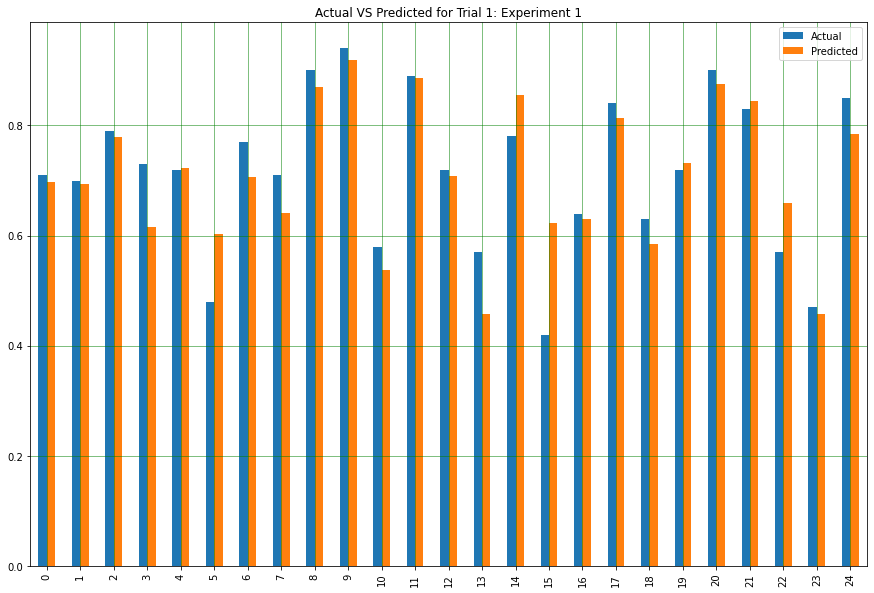

In [17]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual VS Predicted for Trial 1: Experiment 1')
plt.show()

In [81]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MSE = metrics.mean_squared_error(y_test, y_pred)
r2 = round(metrics.r2_score(y_test, y_pred), 2)
mean_target = dataset['Chance of Admit '].mean()

pct_mae = '{} {}'.format(round(MAE / mean_target * 100, 2), '%')
pct_mse = '{} {}'.format(round(MSE / mean_target * 100, 2), '%')
pct_rmse = '{} {}'.format(round(RMSE / mean_target * 100, 2), '%')

index = ['Mean Absolute Error(MAE)', 'Mean Squared Error(MSE)', 'Root Mean Squared Error(RMSE)', 'R2 Score']
eval = pd.DataFrame({'error':[MAE, MSE, RMSE, r2], 'Percentage of errror': [pct_mae, pct_mse, pct_rmse, '-']}, index=index)
eval.sort_values('error')

,error,Percentage of errror
Mean Squared Error(MSE),0.004805,0.66 %
Mean Absolute Error(MAE),0.050088,6.91 %
Root Mean Squared Error(RMSE),0.069319,9.57 %
R2 Score,0.740000,-


### Trial 1, Experiment 2 : Handling the Outliers.

In [18]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


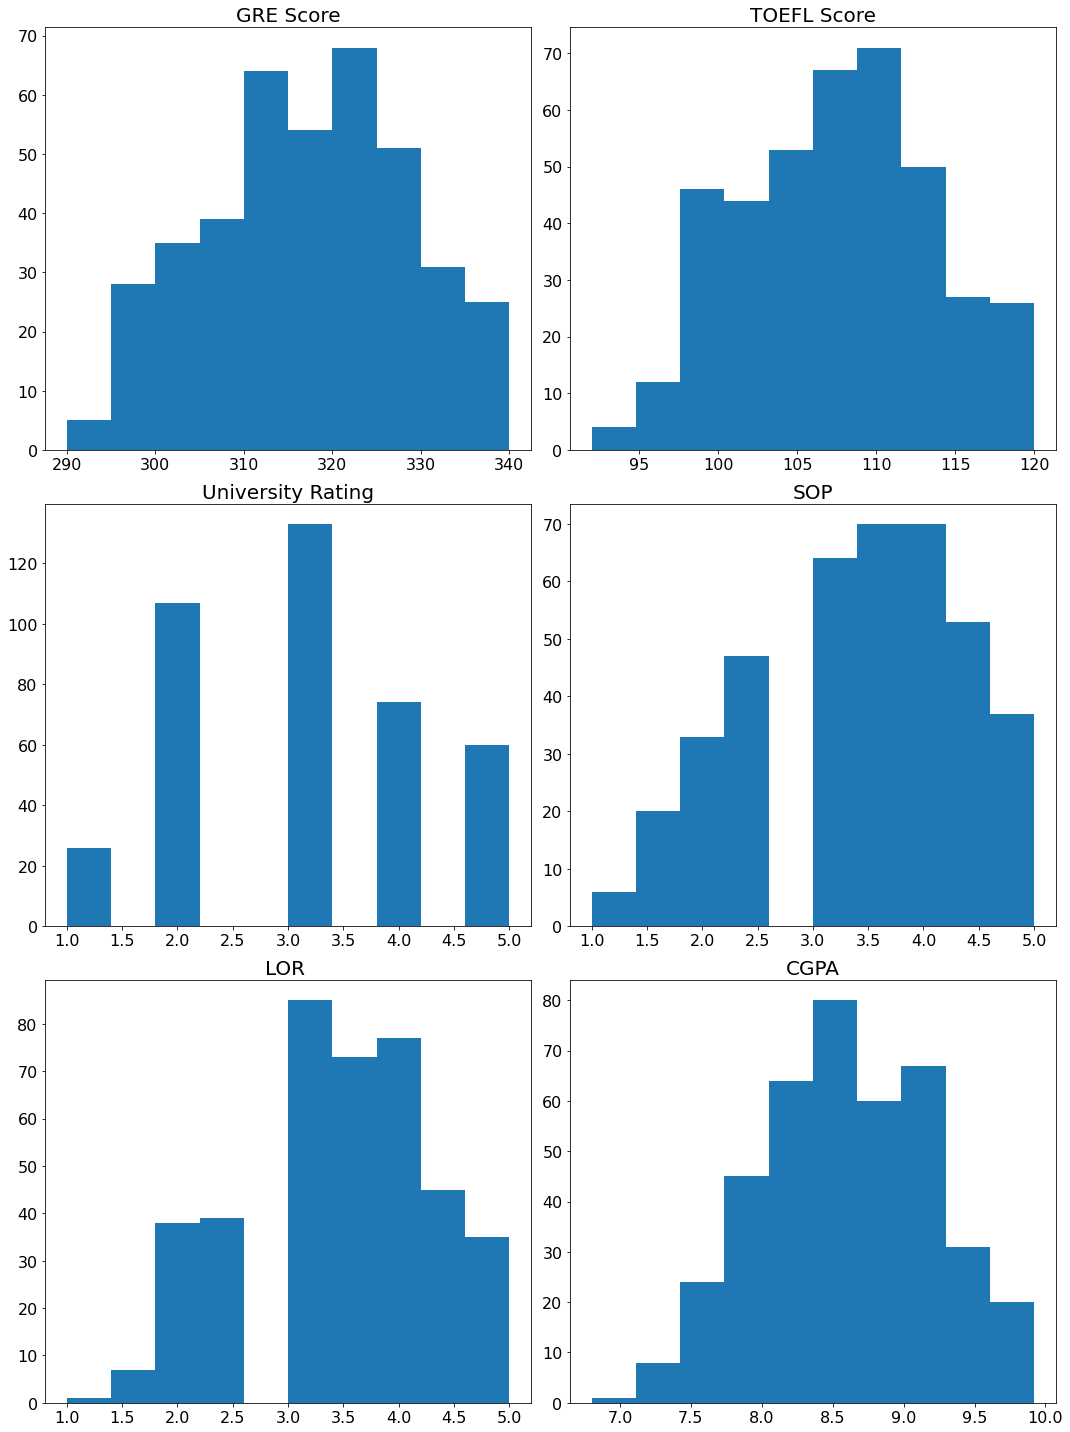

In [19]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,20))
cols = [['GRE Score', 'TOEFL Score'], 
        ['University Rating','SOP'],
        ['LOR ', 'CGPA'], 
        ['Research']]

for a, num in list(zip(axes, range(1, len(axes)+1))):
    for ax, nu in list(zip(a, range(1, len(axes[num-1])+1))):
        ax.hist(dataset[cols[num-1][nu-1]])
        ax.tick_params(axis='both', labelsize=16)
        ax.set_title(cols[num-1][nu-1], fontsize = 20)
plt.tight_layout()

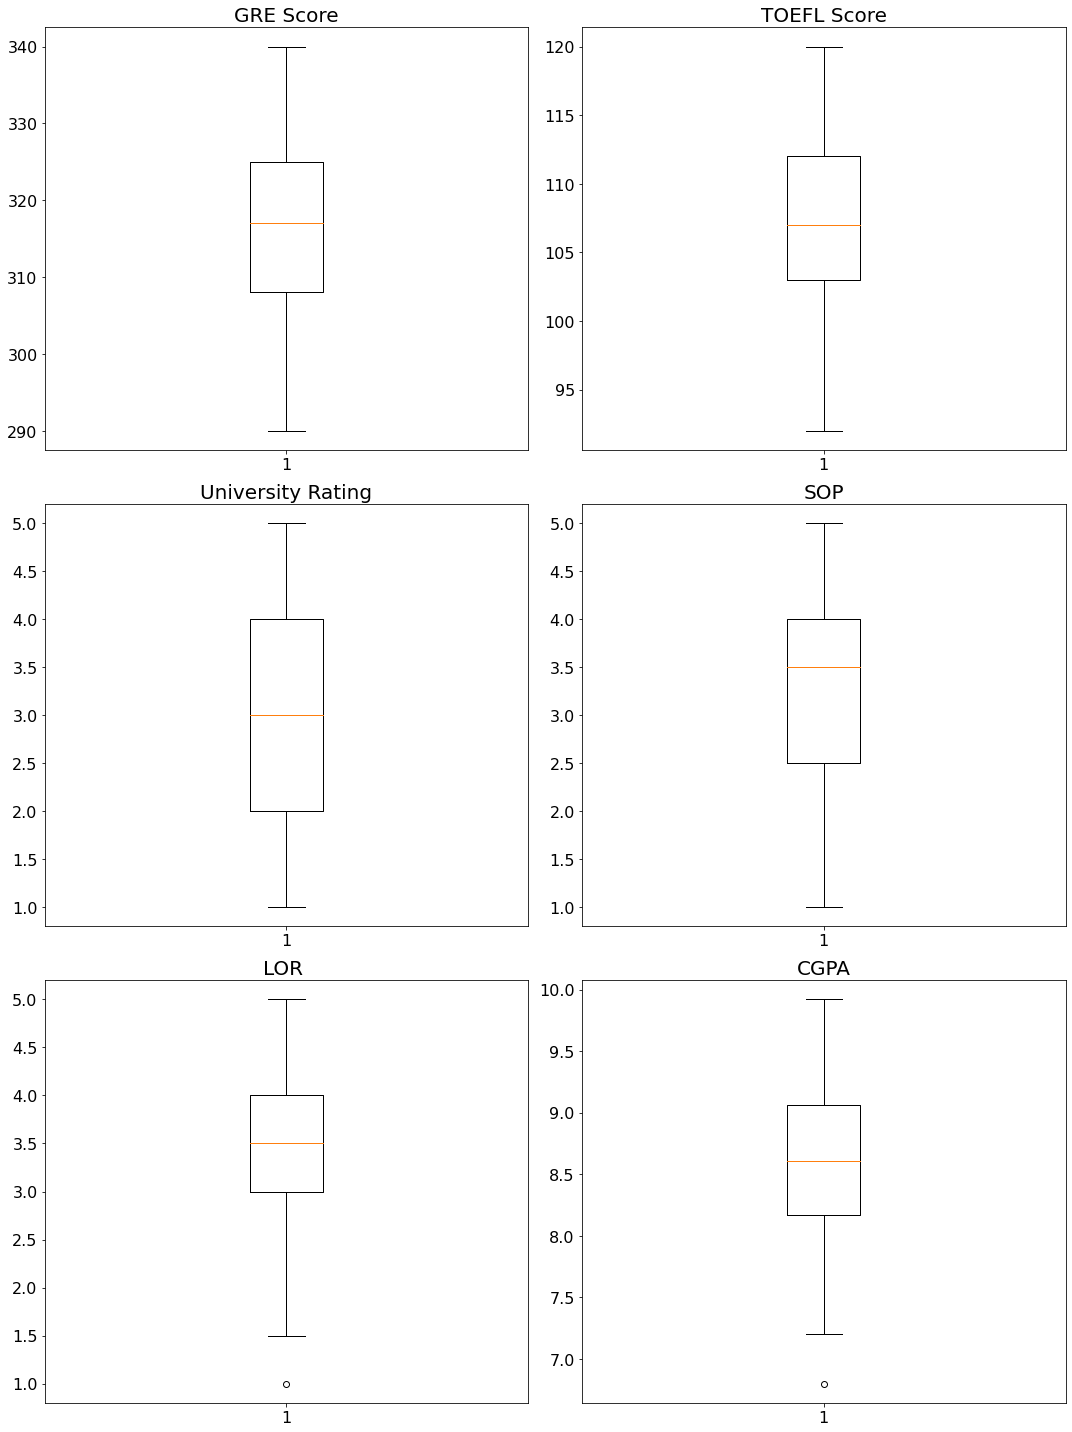

In [20]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15,20))
cols = [['GRE Score', 'TOEFL Score'], 
        ['University Rating','SOP'],
        ['LOR ', 'CGPA'], 
        ['Research']]

for a, num in list(zip(axes, range(1, len(axes)+1))):
    for ax, nu in list(zip(a, range(1, len(axes[num-1])+1))):
        ax.boxplot(dataset[cols[num-1][nu-1]])
        ax.tick_params(axis='both', labelsize=16)
        ax.set_title(cols[num-1][nu-1], fontsize = 20)
plt.tight_layout()

In [21]:
def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

C:\Users\HP.LAPTOP-5BTBEJFV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

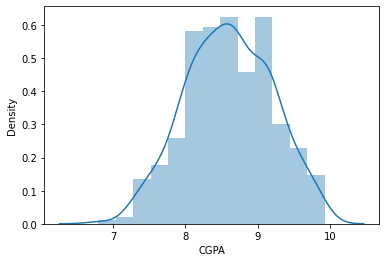

In [27]:
sns.distplot(dataset['CGPA'])

In [22]:
for j in dataset.columns.drop(['Serial No.', 'Chance of Admit ']) :
    Q1 = dataset[j].describe()['25%']
    Q3 = dataset[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah= Q1-(1.5*IQR)
    batas_atas = Q3+(1.5*IQR)
    if find_outlier(dataset[j]) == '':
        print('Feature {} has no Outlier'.format(j))
    else:
        print('Feature {} has {} Outlier which is:'.format(j, (len(find_outlier(dataset[j]).split(',')))-1))
        print(find_outlier(dataset[j]))

Feature GRE Score has no Outlier
Feature TOEFL Score has no Outlier
Feature University Rating has no Outlier
Feature SOP has no Outlier
Feature LOR  has 1 Outlier which is:
1.0, 
Feature CGPA has 1 Outlier which is:
6.8, 
Feature Research has no Outlier


Now, it is clear enough for us that only 2 features has an outliers. so we only have to deal with that features in outliers handling

In [28]:
dataset_no_out = dataset[(dataset['LOR ']!=1.0) & (dataset['CGPA']!=6.8)]

In [29]:
X_2 = dataset_no_out[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y_2 = dataset_no_out[['Chance of Admit ']].values

In [30]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

#Training Model
regressor_2 = LinearRegression()
regressor_2.fit(X_train_2, y_train_2)

LinearRegression()

In [31]:
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame(regressor.coef_[0], X_columns, columns=['Coefficient/Slope'])  
coeff_df.sort_values('Coefficient/Slope', ascending=False)

,Coefficient/Slope
CGPA,0.124632
Research,0.024144
LOR,0.021184
University Rating,0.006572
GRE Score,0.002071
TOEFL Score,0.001955
SOP,-0.004728


### Model : 
> Y_2 = B1X1 + B2X2 + B3X3 + ... + B7X7 + I + e

Y_2 = Admission Admit Prediction of 2nd Experiment

Bn = Coefiecient-n

Xn = Variables/features - n

I = Intercept

e = error

In [32]:
gre = float(input('GRE Score(0-340): '))
toefl = float(input('TOEFL Score(0-120): '))
univ = float(input('Univ Rating(0-5): '))
sop = float(input('Statement of Purpose(0-5): '))
lor = float(input('LOR(0-5): '))
cgpa = float(input('Undergraduate GPA(0-10): '))
research = float(input('GRE Score(0 or 1): '))

Y = ((regressor_2.coef_[0, 0] * gre) + (regressor_2.coef_[0, 1] * toefl) + (regressor_2.coef_[0, 2] * univ) + 
    (regressor_2.coef_[0, 3] * sop) + (regressor_2.coef_[0, 4] * lor) + (regressor_2.coef_[0, 5] * cgpa) + 
    (regressor_2.coef_[0, 6] * research) + regressor_2.intercept_[0])

print('The Prediction of Your Admit Chances: {}%'.format(round(Y*100), 2))

GRE Score(0-340): 45
TOEFL Score(0-120): 45
Univ Rating(0-5): 45
Statement of Purpose(0-5): 45
LOR(0-5): 45
Undergraduate GPA(0-10): 454
GRE Score(0 or 1): 45
The Prediction of Your Admit Chances: 5047.0%


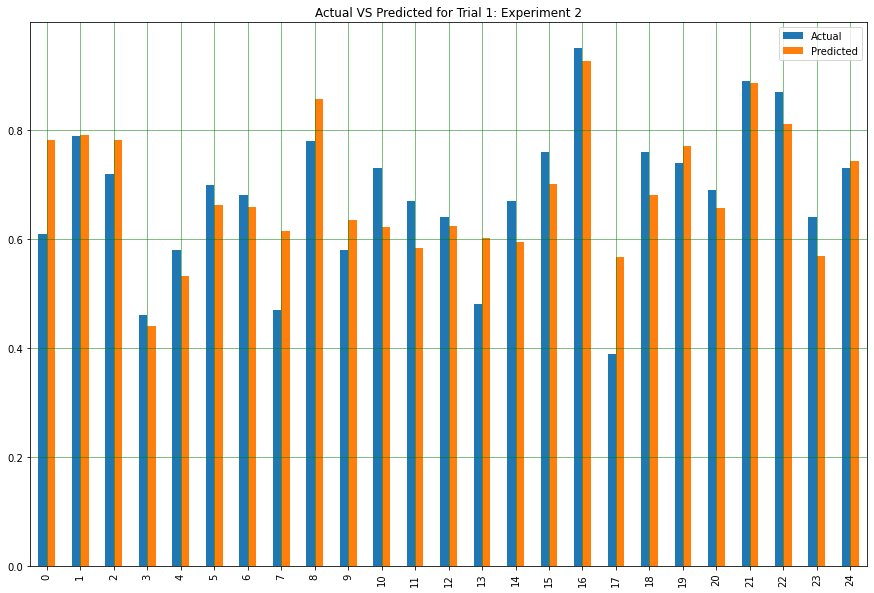

In [33]:
y_pred_2 = regressor_2.predict(X_test_2)

df = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_pred_2.flatten()})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual VS Predicted for Trial 1: Experiment 2')
plt.show()

In [34]:
MAE = metrics.mean_absolute_error(y_test_2, y_pred_2)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2))
MSE = metrics.mean_squared_error(y_test_2, y_pred_2)
r2 = round(metrics.r2_score(y_test_2, y_pred_2), 2)
mean_target = dataset['Chance of Admit '].mean()

pct_mae = '{} {}'.format(round(MAE / mean_target * 100, 2), '%')
pct_mse = '{} {}'.format(round(MSE / mean_target * 100, 2), '%')
pct_rmse = '{} {}'.format(round(RMSE / mean_target * 100, 2), '%')

index = ['Mean Absolute Error(MAE)', 'Mean Squared Error(MSE)', 'Root Mean Squared Error(RMSE)', 'R2 Score']
eval_2 = pd.DataFrame({'error_2':[MAE, MSE, RMSE, r2], 
                       'Error Percentage of Ex_2': [pct_mae, pct_mse, pct_rmse, '-']}, index=index)
eval_2.sort_values('error_2')

,error_2,Error Percentage of Ex_2
Mean Squared Error(MSE),0.004625,0.64 %
Mean Absolute Error(MAE),0.051760,7.15 %
Root Mean Squared Error(RMSE),0.068004,9.39 %
R2 Score,0.730000,-


### Trial 1, Experiment 3 : Outliers Handling and Data Scalling.

In [26]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
dataset_no_out = dataset[(dataset['LOR ']!=1.0) & (dataset['CGPA']!=6.8)]

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, Binarizer
#Scalling Features with no Outliers
for i in dataset_no_out.columns.drop(['Chance of Admit ', 'Serial No.']):
    dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])


<ipython-input-28-fb6497b3746a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
<ipython-input-28-fb6497b3746a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
<ipython-input-28-fb6497b3746a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [29]:
dataset_no_out

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE Score MinMax scl,TOEFL Score MinMax scl,University Rating MinMax scl,SOP MinMax scl,LOR MinMax scl,CGPA MinMax scl,Research MinMax scl
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.94,0.928571,0.75,0.875,0.857143,0.900735,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.68,0.535714,0.75,0.750,0.857143,0.613971,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.52,0.428571,0.50,0.500,0.571429,0.294118,1.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.64,0.642857,0.50,0.625,0.285714,0.540441,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.48,0.392857,0.25,0.250,0.428571,0.371324,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,0.68,0.642857,0.50,0.625,0.571429,0.676471,1.0
396,397,325,107,3,3.0,3.5,9.11,1,0.84,0.70,0.535714,0.50,0.500,0.571429,0.702206,1.0
397,398,330,116,4,5.0,4.5,9.45,1,0.91,0.80,0.857143,0.75,1.000,0.857143,0.827206,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0.44,0.392857,0.50,0.625,0.714286,0.580882,0.0


In [30]:
dataset_scaled = dataset_no_out[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                                 'University Rating MinMax scl', 'SOP MinMax scl',
                                 'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl', 'Chance of Admit ']]
X_3 = dataset_scaled[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                      'University Rating MinMax scl', 'SOP MinMax scl',
                      'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl']].values
y_3 = dataset_scaled[['Chance of Admit ']].values


In [31]:
dataset_scaled.head(3)

,GRE Score MinMax scl,TOEFL Score MinMax scl,University Rating MinMax scl,SOP MinMax scl,Research MinMax scl,LOR MinMax scl,CGPA MinMax scl,Chance of Admit
0,0.94,0.928571,0.75,0.875,1.0,0.857143,0.900735,0.92
1,0.68,0.535714,0.75,0.750,1.0,0.857143,0.613971,0.76
2,0.52,0.428571,0.50,0.500,1.0,0.571429,0.294118,0.72


In [32]:
X_3 = dataset_scaled[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                      'University Rating MinMax scl', 'SOP MinMax scl',
                      'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl']].values
y_3 = dataset_scaled[['Chance of Admit ']].values

In [33]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=0)

#Training Model
regressor_3 = LinearRegression()
regressor_3.fit(X_train_3, y_train_3)

LinearRegression()

In [34]:
X_columns = dataset_scaled[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                            'University Rating MinMax scl', 'SOP MinMax scl',
                            'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl']].columns
coeff_df = pd.DataFrame(regressor_3.coef_[0], X_columns, columns=['Coefficient/Slope'])  
coeff_df.sort_values('Coefficient/Slope', ascending=False)

,Coefficient/Slope
CGPA MinMax scl,0.293865
GRE Score MinMax scl,0.113337
LOR MinMax scl,0.084820
TOEFL Score MinMax scl,0.068235
University Rating MinMax scl,0.028160
Research MinMax scl,0.026039
SOP MinMax scl,-0.006060


### Model : 
> Y_3 = B1X1 + B2X2 + B3X3 + ... + B7X7 + I + e

Y_3 = Admission Admit Prediction of 3rd Experiment

Bn = Coefiecient-n

Xn = Variables/features - n

I = Intercept

e = error

In [35]:
dataset_scaled.describe()

,GRE Score MinMax scl,TOEFL Score MinMax scl,University Rating MinMax scl,SOP MinMax scl,Research MinMax scl,LOR MinMax scl,CGPA MinMax scl,Chance of Admit
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.537889,0.552315,0.524497,0.601759,0.547739,0.560660,0.517135,0.726030
std,0.228727,0.215445,0.284236,0.250491,0.498342,0.254072,0.216001,0.140959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340000
25%,0.380000,0.392857,0.250000,0.375000,0.000000,0.428571,0.360294,0.640000
50%,0.540000,0.535714,0.500000,0.625000,1.000000,0.571429,0.522059,0.730000
75%,0.700000,0.714286,0.750000,0.750000,1.000000,0.714286,0.686581,0.830000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970000


In [36]:
gre = float(input('GRE Score(0-1): '))
toefl = float(input('TOEFL Score(0-1): '))
univ = float(input('Univ Rating(0-1): '))
sop = float(input('Statement of Purpose(0-1): '))
lor = float(input('LOR(-2 - 1.5): '))
cgpa = float(input('Undergraduate GPA(-1 - 1.46): '))
research = float(input('Research(0-1): '))

Y = ((regressor_3.coef_[0, 0] * gre) + (regressor_3.coef_[0, 1] * toefl) + (regressor_3.coef_[0, 2] * univ) + 
    (regressor_3.coef_[0, 3] * sop) + (regressor_3.coef_[0, 4] * lor) + (regressor_3.coef_[0, 5] * cgpa) + 
    (regressor_3.coef_[0, 6] * research) + regressor_3.intercept_[0])

print('The Prediction of Your Admit Chances: {}%'.format(round(Y*100), 2))

GRE Score(0-1): 34
TOEFL Score(0-1): 434
Univ Rating(0-1): 34
Statement of Purpose(0-1): 34
LOR(-2 - 1.5): 34
Undergraduate GPA(-1 - 1.46): 34
Research(0-1): 34
The Prediction of Your Admit Chances: 4838.0%


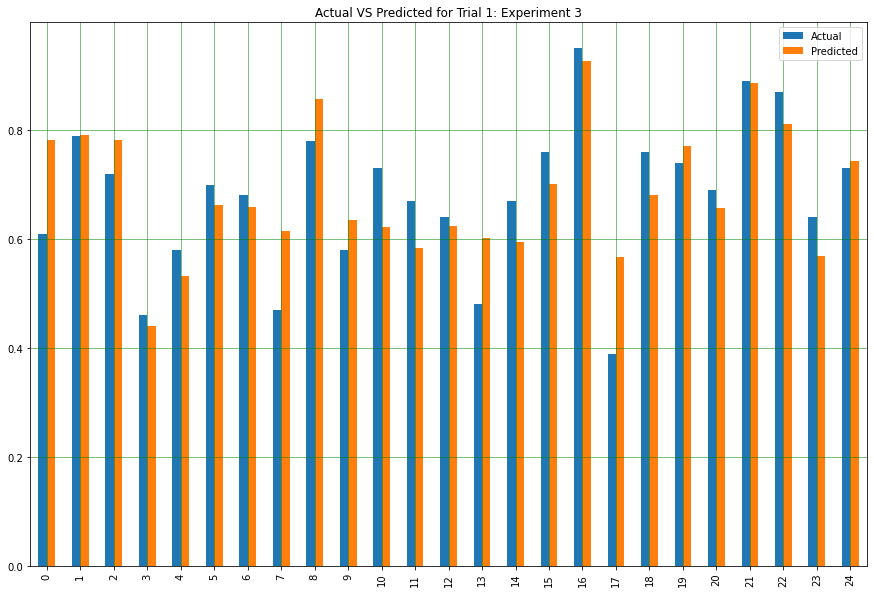

In [37]:
y_pred_3 = regressor_3.predict(X_test_3)

df = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_pred_3.flatten()})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual VS Predicted for Trial 1: Experiment 3')
plt.show()

In [38]:
MAE = metrics.mean_absolute_error(y_test_3, y_pred_3)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_3, y_pred_3))
MSE = metrics.mean_squared_error(y_test_3, y_pred_3)
r2 = round(metrics.r2_score(y_test_3, y_pred_3), 3)
mean_target = dataset['Chance of Admit '].mean()

pct_mae = '{} {}'.format(round(MAE / mean_target * 100, 2), '%')
pct_mse = '{} {}'.format(round(MSE / mean_target * 100, 2), '%')
pct_rmse = '{} {}'.format(round(RMSE / mean_target * 100, 2), '%')

index = ['Mean Absolute Error(MAE)', 'Mean Squared Error(MSE)', 'Root Mean Squared Error(RMSE)', 'R2 Score']
eval_3 = pd.DataFrame({'error_3':[MAE, MSE, RMSE, r2], 
                       'Error Percentage of Ex_3': [pct_mae, pct_mse, pct_rmse, '-']}, index=index)
eval_3.sort_values('error_3')

,error_3,Error Percentage of Ex_3
Mean Squared Error(MSE),0.004625,0.64 %
Mean Absolute Error(MAE),0.051760,7.15 %
Root Mean Squared Error(RMSE),0.068004,9.39 %
R2 Score,0.726000,-


In [39]:
dfs = [eval, eval_2, eval_3]
pd.concat(dfs, axis=1).T

,Mean Absolute Error(MAE),Mean Squared Error(MSE),Root Mean Squared Error(RMSE),R2 Score
error,0.0500875,0.00480516,0.0693192,0.74
Percentage of errror,6.91 %,0.66 %,9.57 %,-
error_2,0.0517597,0.00462456,0.0680041,0.73
Error Percentage of Ex_2,7.15 %,0.64 %,9.39 %,-
error_3,0.0517597,0.00462456,0.0680041,0.726
Error Percentage of Ex_3,7.15 %,0.64 %,9.39 %,-


### Trial 2, Experiment 1 : No Intervensions, 90% data train and 10% data test

In [40]:
X_4 = dataset[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y_4 = dataset[['Chance of Admit ']].values

In [41]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.1, random_state=0)

#Training Model
regressor_4 = LinearRegression()
regressor_4.fit(X_train_4, y_train_4)

LinearRegression()

In [42]:
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame(regressor_4.coef_[0], X_columns, columns=['Coefficient/Slope'])  
coeff_df.sort_values('Coefficient/Slope', ascending=False)

,Coefficient/Slope
CGPA,0.121433
LOR,0.021469
Research,0.021451
University Rating,0.007823
TOEFL Score,0.002781
GRE Score,0.001844
SOP,-0.005379


### Model : 
> Y = B1X1 + B2X2 + B3X3 + ... + B7X7 + I + e

Y = Admission Admit Prediction

Bn = Coefiecient-n

Xn = Variables/features - n

I = Intercept

e = error

In [43]:
gre = float(input('GRE Score(0-340): '))
toefl = float(input('TOEFL Score(0-120): '))
univ = float(input('Univ Rating(0-5): '))
sop = float(input('Statement of Purpose(0-5): '))
lor = float(input('LOR(0-5): '))
cgpa = float(input('Undergraduate GPA(0-10): '))
research = float(input('GRE Score(0 or 1): '))

Y = ((regressor_4.coef_[0, 0] * gre) + (regressor_4.coef_[0, 1] * toefl) + (regressor_4.coef_[0, 2] * univ) + 
    (regressor_4.coef_[0, 3] * sop) + (regressor_4.coef_[0, 4] * lor) + (regressor_4.coef_[0, 5] * cgpa) + 
    (regressor_4.coef_[0, 6] * research) + regressor_4.intercept_[0])

print('The Prediction of Your Admit Chances: {}%'.format(round(Y*100), 2))

GRE Score(0-340): 45
TOEFL Score(0-120): 54
Univ Rating(0-5): 54
Statement of Purpose(0-5): 54
LOR(0-5): 54
Undergraduate GPA(0-10): 54
GRE Score(0 or 1): 5
The Prediction of Your Admit Chances: 689.0%


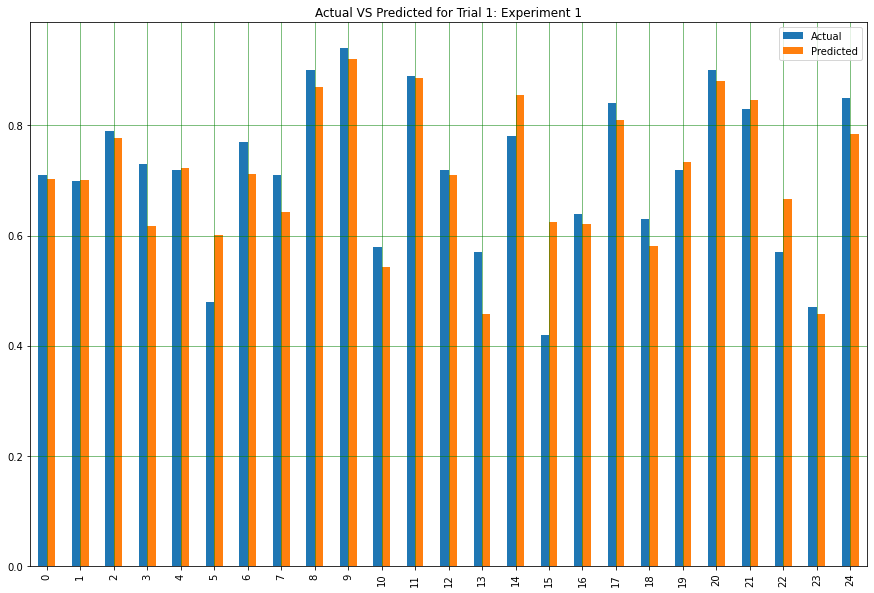

In [44]:
y_pred_4 = regressor_4.predict(X_test_4)

df = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_pred_4.flatten()})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual VS Predicted for Trial 1: Experiment 1')
plt.show()

In [45]:
MAE = metrics.mean_absolute_error(y_test_4, y_pred_4)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_4, y_pred_4))
MSE = metrics.mean_squared_error(y_test_4, y_pred_4)
r2 = round(metrics.r2_score(y_test_4, y_pred_4), 2)
mean_target = dataset['Chance of Admit '].mean()

pct_mae = '{} {}'.format(round(MAE / mean_target * 100, 2), '%')
pct_mse = '{} {}'.format(round(MSE / mean_target * 100, 2), '%')
pct_rmse = '{} {}'.format(round(RMSE / mean_target * 100, 2), '%')

index = ['Mean Absolute Error(MAE)', 'Mean Squared Error(MSE)', 'Root Mean Squared Error(RMSE)', 'R2 Score']
eval_4 = pd.DataFrame({'error_4':[MAE, MSE, RMSE, r2], 'Error Percentage Ex_4': [pct_mae, pct_mse, pct_rmse, '-']}, index=index)
eval_4.sort_values('error_4')

,error_4,Error Percentage Ex_4
Mean Squared Error(MSE),0.005291,0.73 %
Mean Absolute Error(MAE),0.050936,7.03 %
Root Mean Squared Error(RMSE),0.072736,10.04 %
R2 Score,0.730000,-


### Trial 1, Experiment 2 : Handling the Outliers.

In [46]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [47]:
def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

In [48]:
for j in dataset.columns.drop(['Serial No.', 'Chance of Admit ']) :
    Q1 = dataset[j].describe()['25%']
    Q3 = dataset[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah= Q1-(1.5*IQR)
    batas_atas = Q3+(1.5*IQR)
    if find_outlier(dataset[j]) == '':
        print('Feature {} has no Outlier'.format(j))
    else:
        print('Feature {} has {} Outlier which is:'.format(j, (len(find_outlier(dataset[j]).split(',')))-1))
        print(find_outlier(dataset[j]))

Feature GRE Score has no Outlier
Feature TOEFL Score has no Outlier
Feature University Rating has no Outlier
Feature SOP has no Outlier
Feature LOR  has 1 Outlier which is:
1.0, 
Feature CGPA has 1 Outlier which is:
6.8, 
Feature Research has no Outlier


Now, it is clear enough for us that only 2 features has an outliers. so we only have to deal with that features in outliers handling

In [49]:
dataset_no_out = dataset[(dataset['LOR ']!=1.0) & (dataset['CGPA']!=6.8)]

In [50]:
X_5 = dataset_no_out[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values
y_5 = dataset_no_out[['Chance of Admit ']].values

In [51]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.1, random_state=0)

#Training Model
regressor_5 = LinearRegression()
regressor_5.fit(X_train_5, y_train_5)

LinearRegression()

In [52]:
X_columns = dataset[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].columns
coeff_df = pd.DataFrame(regressor_5.coef_[0], X_columns, columns=['Coefficient/Slope'])  
coeff_df.sort_values('Coefficient/Slope', ascending=False)

,Coefficient/Slope
CGPA,0.107017
LOR,0.023704
Research,0.022925
University Rating,0.005915
TOEFL Score,0.002801
GRE Score,0.002242
SOP,-0.002307


### Model : 
> Y_2 = B1X1 + B2X2 + B3X3 + ... + B7X7 + I + e

Y_2 = Admission Admit Prediction of 2nd Experiment

Bn = Coefiecient-n

Xn = Variables/features - n

I = Intercept

e = error

In [53]:
gre = float(input('GRE Score(0-340): '))
toefl = float(input('TOEFL Score(0-120): '))
univ = float(input('Univ Rating(0-5): '))
sop = float(input('Statement of Purpose(0-5): '))
lor = float(input('LOR(0-5): '))
cgpa = float(input('Undergraduate GPA(0-10): '))
research = float(input('GRE Score(0 or 1): '))

Y = ((regressor_5.coef_[0, 0] * gre) + (regressor_5.coef_[0, 1] * toefl) + (regressor_5.coef_[0, 2] * univ) + 
    (regressor_5.coef_[0, 3] * sop) + (regressor_5.coef_[0, 4] * lor) + (regressor_5.coef_[0, 5] * cgpa) + 
    (regressor_5.coef_[0, 6] * research) + regressor_5.intercept_[0])

print('The Prediction of Your Admit Chances: {}%'.format(round(Y*100), 2))

GRE Score(0-340): 34
TOEFL Score(0-120): 43
Univ Rating(0-5): 43
Statement of Purpose(0-5): 2
LOR(0-5): 1
Undergraduate GPA(0-10): 1
GRE Score(0 or 1): 1
The Prediction of Your Admit Chances: -71.0%


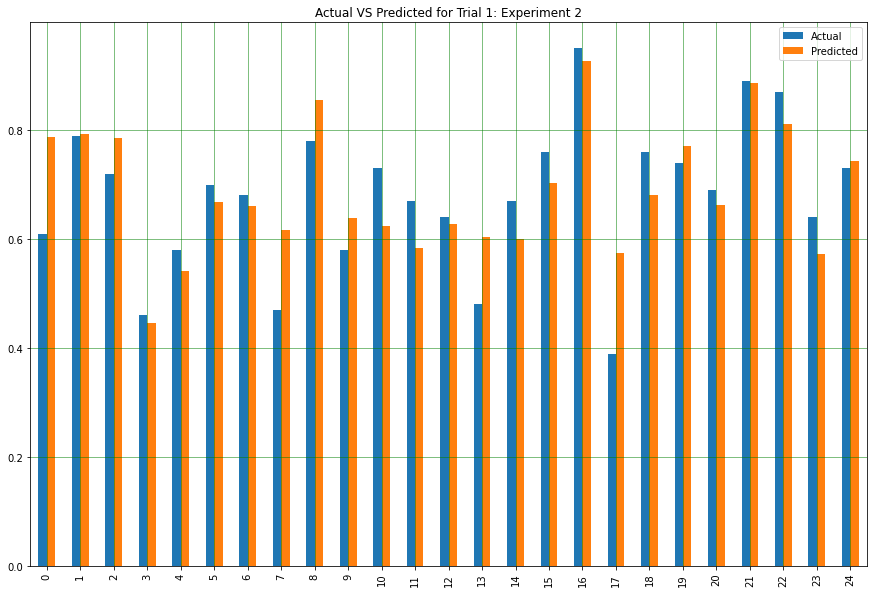

In [54]:
y_pred_5 = regressor_5.predict(X_test_5)

df = pd.DataFrame({'Actual': y_test_5.flatten(), 'Predicted': y_pred_5.flatten()})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual VS Predicted for Trial 1: Experiment 2')
plt.show()

In [55]:
MAE = metrics.mean_absolute_error(y_test_5, y_pred_5)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_5, y_pred_5))
MSE = metrics.mean_squared_error(y_test_5, y_pred_5)
r2 = round(metrics.r2_score(y_test_5, y_pred_5), 2)
mean_target = dataset['Chance of Admit '].mean()

pct_mae = '{} {}'.format(round(MAE / mean_target * 100, 2), '%')
pct_mse = '{} {}'.format(round(MSE / mean_target * 100, 2), '%')
pct_rmse = '{} {}'.format(round(RMSE / mean_target * 100, 2), '%')

index = ['Mean Absolute Error(MAE)', 'Mean Squared Error(MSE)', 'Root Mean Squared Error(RMSE)', 'R2 Score']
eval_5 = pd.DataFrame({'error_5':[MAE, MSE, RMSE, r2], 
                       'Error Percentage of Ex_5': [pct_mae, pct_mse, pct_rmse, '-']}, index=index)
eval_5.sort_values('error_5')

,error_5,Error Percentage of Ex_5
Mean Squared Error(MSE),0.005336,0.74 %
Mean Absolute Error(MAE),0.055835,7.71 %
Root Mean Squared Error(RMSE),0.073050,10.08 %
R2 Score,0.700000,-


### Trial 1, Experiment 3 : Outliers Handling and Data Scalling.

In [56]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
dataset_no_out = dataset[(dataset['LOR ']!=1.0) & (dataset['CGPA']!=6.8)]

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer, Binarizer
#Scalling Features with no Outliers
for i in dataset_no_out.columns.drop(['Chance of Admit ', 'Serial No.']):
    dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])


<ipython-input-58-fb6497b3746a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
<ipython-input-58-fb6497b3746a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_out['{} MinMax scl'.format(i)] = MinMaxScaler().fit_transform(dataset_no_out[[i]])
<ipython-input-58-fb6497b3746a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [59]:
dataset_no_out

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE Score MinMax scl,TOEFL Score MinMax scl,University Rating MinMax scl,SOP MinMax scl,LOR MinMax scl,CGPA MinMax scl,Research MinMax scl
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.94,0.928571,0.75,0.875,0.857143,0.900735,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.68,0.535714,0.75,0.750,0.857143,0.613971,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.52,0.428571,0.50,0.500,0.571429,0.294118,1.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.64,0.642857,0.50,0.625,0.285714,0.540441,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.48,0.392857,0.25,0.250,0.428571,0.371324,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,0.68,0.642857,0.50,0.625,0.571429,0.676471,1.0
396,397,325,107,3,3.0,3.5,9.11,1,0.84,0.70,0.535714,0.50,0.500,0.571429,0.702206,1.0
397,398,330,116,4,5.0,4.5,9.45,1,0.91,0.80,0.857143,0.75,1.000,0.857143,0.827206,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0.44,0.392857,0.50,0.625,0.714286,0.580882,0.0


In [60]:
dataset_scaled = dataset_no_out[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                                 'University Rating MinMax scl', 'SOP MinMax scl',
                                 'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl', 'Chance of Admit ']]

In [61]:
dataset_scaled.head(3)

,GRE Score MinMax scl,TOEFL Score MinMax scl,University Rating MinMax scl,SOP MinMax scl,Research MinMax scl,LOR MinMax scl,CGPA MinMax scl,Chance of Admit
0,0.94,0.928571,0.75,0.875,1.0,0.857143,0.900735,0.92
1,0.68,0.535714,0.75,0.750,1.0,0.857143,0.613971,0.76
2,0.52,0.428571,0.50,0.500,1.0,0.571429,0.294118,0.72


In [62]:
X_6 = dataset_scaled[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                      'University Rating MinMax scl', 'SOP MinMax scl',
                      'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl']].values
y_6 = dataset_scaled[['Chance of Admit ']].values

In [63]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.1,random_state=0)

#Training Model
regressor_6= LinearRegression()
regressor_6.fit(X_train_6 ,y_train_6)

LinearRegression()

In [64]:
X_columns = dataset_scaled[['GRE Score MinMax scl', 'TOEFL Score MinMax scl',
                            'University Rating MinMax scl', 'SOP MinMax scl',
                            'Research MinMax scl', 'LOR  MinMax scl', 'CGPA MinMax scl']].columns
coeff_df = pd.DataFrame(regressor_6.coef_[0], X_columns, columns=['Coefficient/Slope'])  
coeff_df.sort_values('Coefficient/Slope', ascending=False)

,Coefficient/Slope
CGPA MinMax scl,0.291087
GRE Score MinMax scl,0.112086
LOR MinMax scl,0.082964
TOEFL Score MinMax scl,0.078422
University Rating MinMax scl,0.023662
Research MinMax scl,0.022925
SOP MinMax scl,-0.009229


### Model : 
> Y_3 = B1X1 + B2X2 + B3X3 + ... + B7X7 + I + e

Y_3 = Admission Admit Prediction of 3rd Experiment

Bn = Coefiecient-n

Xn = Variables/features - n

I = Intercept

e = error

In [65]:
dataset_scaled.describe()

,GRE Score MinMax scl,TOEFL Score MinMax scl,University Rating MinMax scl,SOP MinMax scl,Research MinMax scl,LOR MinMax scl,CGPA MinMax scl,Chance of Admit
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.537889,0.552315,0.524497,0.601759,0.547739,0.560660,0.517135,0.726030
std,0.228727,0.215445,0.284236,0.250491,0.498342,0.254072,0.216001,0.140959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340000
25%,0.380000,0.392857,0.250000,0.375000,0.000000,0.428571,0.360294,0.640000
50%,0.540000,0.535714,0.500000,0.625000,1.000000,0.571429,0.522059,0.730000
75%,0.700000,0.714286,0.750000,0.750000,1.000000,0.714286,0.686581,0.830000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970000


In [66]:
gre = float(input('GRE Score(0-1): '))
toefl = float(input('TOEFL Score(0-1): '))
univ = float(input('Univ Rating(0-1): '))
sop = float(input('Statement of Purpose(0-1): '))
lor = float(input('LOR(-2 - 1.5): '))
cgpa = float(input('Undergraduate GPA(-1 - 1.46): '))
research = float(input('Research(0-1): '))

Y = ((regressor_6.coef_[0, 0] * gre) + (regressor_6.coef_[0, 1] * toefl) + (regressor_6.coef_[0, 2] * univ) + 
    (regressor_6.coef_[0, 3] * sop) + (regressor_6.coef_[0, 4] * lor) + (regressor_6.coef_[0, 5] * cgpa) + 
    (regressor_6.coef_[0, 6] * research) + regressor_6.intercept_[0])

print('The Prediction of Your Admit Chances: {}%'.format(round(Y*100), 2))

GRE Score(0-1): 343
TOEFL Score(0-1): 43
Univ Rating(0-1): 43
Statement of Purpose(0-1): 43
LOR(-2 - 1.5): 43
Undergraduate GPA(-1 - 1.46): 43
Research(0-1): 4343
The Prediction of Your Admit Chances: 131159.0%


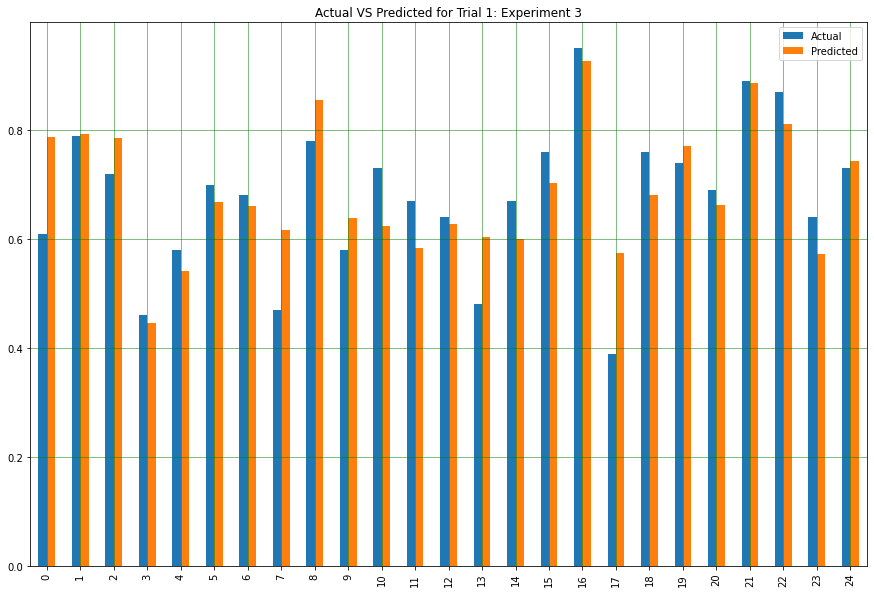

In [67]:
y_pred_6 = regressor_6.predict(X_test_6)

df = pd.DataFrame({'Actual': y_test_6.flatten(), 'Predicted': y_pred_6.flatten()})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual VS Predicted for Trial 1: Experiment 3')
plt.show()

In [68]:
MAE = metrics.mean_absolute_error(y_test_6, y_pred_6)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_6, y_pred_6))
MSE = metrics.mean_squared_error(y_test_6, y_pred_6)
r2 = round(metrics.r2_score(y_test_6, y_pred_6), 3)
mean_target = dataset['Chance of Admit '].mean()

pct_mae = '{} {}'.format(round(MAE / mean_target * 100, 2), '%')
pct_mse = '{} {}'.format(round(MSE / mean_target * 100, 2), '%')
pct_rmse = '{} {}'.format(round(RMSE / mean_target * 100, 2), '%')

index = ['Mean Absolute Error(MAE)', 'Mean Squared Error(MSE)', 'Root Mean Squared Error(RMSE)', 'R2 Score']
eval_6 = pd.DataFrame({'error_6':[MAE, MSE, RMSE, r2], 
                       'Error Percentage of Ex_6': [pct_mae, pct_mse, pct_rmse, '-']}, index=index)
eval_6.sort_values('error_6')

,error_6,Error Percentage of Ex_6
Mean Squared Error(MSE),0.005336,0.74 %
Mean Absolute Error(MAE),0.055835,7.71 %
Root Mean Squared Error(RMSE),0.073050,10.08 %
R2 Score,0.701000,-


In [69]:
eval_list = [eval, eval_2, eval_3, eval_4, eval_5, eval_6]
eval_all = pd.concat(eval_list, axis=1).T

In [70]:
eval_all

,Mean Absolute Error(MAE),Mean Squared Error(MSE),Root Mean Squared Error(RMSE),R2 Score
error,0.0500875,0.00480516,0.0693192,0.74
Percentage of errror,6.91 %,0.66 %,9.57 %,-
error_2,0.0517597,0.00462456,0.0680041,0.73
Error Percentage of Ex_2,7.15 %,0.64 %,9.39 %,-
error_3,0.0517597,0.00462456,0.0680041,0.726
Error Percentage of Ex_3,7.15 %,0.64 %,9.39 %,-
error_4,0.0509363,0.00529055,0.0727362,0.73
Error Percentage Ex_4,7.03 %,0.73 %,10.04 %,-
error_5,0.0558352,0.00533627,0.0730498,0.7
Error Percentage of Ex_5,7.71 %,0.74 %,10.08 %,-



## Reference
- Nagesh Singh Chauhan, "A beginner’s guide to Linear Regression in Python with Scikit-Learn", https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
- Dataset source: https://www.kaggle.com/mohansacharya/graduate-admissions/data
- Manja Bogicevic, "Multiple Linear Regression Using Python", https://medium.com/@manjabogicevic/multiple-linear-regression-using-python-b99754591ac0
- Arnav Oberoi, "Multiple Linear Regression-Beginner’s Guide", https://towardsdatascience.com/multiple-linear-regression-beginners-guide-5b602d716aa3
- Abin Joy, "Multiple Linear Regression with Python", https://medium.com/analytics-vidhya/multiple-linear-regression-with-python-98f4a7f1c26c
- Jeff Macaluso, "Testing Linear Regression Assumptions in Python ", https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
- Data to Fish, "Linear Regression in Python using Statsmodels", https://datatofish.com/statsmodels-linear-regression/
- Jeff Macaluso, "Testing Linear Regression Assumptions in Python", https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/